In [1]:
%pip install vaex

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd 
import vaex
import numpy as np
import vaex.ml
from vaex.ml.sklearn import Predictor
from sklearn.ensemble import GradientBoostingClassifier
import pylab as plt
df1 = pd.read_csv('labels.csv')
df1

,MachineId,MeasurementId,PumpFailed,SlowStart,SlowEnd
0,0_0_0,0,False,False,False
1,0_0_1,-1,NaN,NaN,NaN
2,0_0_2,0,False,False,False
3,0_0_3,0,True,False,False
4,0_1_0,-1,NaN,NaN,NaN
...,...,...,...,...,...
27380,10_0_2,8833,False,False,False
27381,10_0_3,8833,False,False,False
27382,10_0_0,8834,False,False,False
27383,10_0_1,8834,False,False,True


In [3]:
df1 = df1.fillna(method='bfill',axis=0).fillna(0)
df1.isnull().sum()

MachineId        0
MeasurementId    0
PumpFailed       0
SlowStart        0
SlowEnd          0
dtype: int64

In [4]:
df1 = df1.astype(int)
df1.dtypes

MachineId        int64
MeasurementId    int64
PumpFailed       int64
SlowStart        int64
SlowEnd          int64
dtype: object

In [5]:
df1

,MachineId,MeasurementId,PumpFailed,SlowStart,SlowEnd
0,0,0,0,0,0
1,1,-1,0,0,0
2,2,0,0,0,0
3,3,0,1,0,0
4,10,-1,1,0,0
...,...,...,...,...,...
27380,1002,8833,0,0,0
27381,1003,8833,0,0,0
27382,1000,8834,0,0,0
27383,1001,8834,0,0,1


In [6]:
df_full = vaex.from_pandas(df1)

In [7]:
df_full

#,MachineId,MeasurementId,PumpFailed,SlowStart,SlowEnd
0,0,0,0,0,0
1,1,-1,0,0,0
2,2,0,0,0,0
3,3,0,1,0,0
4,10,-1,1,0,0
...,...,...,...,...,...
"27,380",1002,8833,0,0,0
"27,381",1003,8833,0,0,0
"27,382",1000,8834,0,0,0
"27,383",1001,8834,0,0,1


In [8]:
df2 = pd.read_parquet('data.parquet')
df2.to_csv('data.csv')

In [9]:
df2

,MachineId,MeasurementId,Pressure
0,0_0_0,0,0.0
1,0_0_0,0,0.0
2,0_0_0,0,0.0
3,0_0_0,0,0.0
4,0_0_0,0,0.0
...,...,...,...
18466359,10_0_3,8834,0.0
18466360,10_0_3,8834,0.0
18466361,10_0_3,8834,0.0
18466362,10_0_3,8834,0.0


In [10]:
df2.dtypes

MachineId         object
MeasurementId      int64
Pressure         float64
dtype: object

In [11]:
df2.isnull().sum()

MachineId        0
MeasurementId    0
Pressure         0
dtype: int64

In [12]:
df2 = df2.astype(int)
df2.dtypes

MachineId        int64
MeasurementId    int64
Pressure         int64
dtype: object

In [13]:
df2

,MachineId,MeasurementId,Pressure
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0
...,...,...,...
18466359,1003,8834,0
18466360,1003,8834,0
18466361,1003,8834,0
18466362,1003,8834,0


In [14]:
df_full_2 = vaex.from_pandas(df2)

In [15]:
#The place where I made a "mistake"
data = vaex.concat([df_full,df_full_2],resolver='flexible') 
data

#,MachineId,MeasurementId,PumpFailed,SlowStart,SlowEnd,Pressure
0,0,0,0,0,0,--
1,1,-1,0,0,0,--
2,2,0,0,0,0,--
3,3,0,1,0,0,--
4,10,-1,1,0,0,--
...,...,...,...,...,...,...
"18,493,744",1003,8834,--,--,--,0
"18,493,745",1003,8834,--,--,--,0
"18,493,746",1003,8834,--,--,--,0
"18,493,747",1003,8834,--,--,--,0


In [16]:
df_fill = data.to_pandas_df()
df_fill

,MachineId,MeasurementId,PumpFailed,SlowStart,SlowEnd,Pressure
0,0,0,0.0,0.0,0.0,NaN
1,1,-1,0.0,0.0,0.0,NaN
2,2,0,0.0,0.0,0.0,NaN
3,3,0,1.0,0.0,0.0,NaN
4,10,-1,1.0,0.0,0.0,NaN
...,...,...,...,...,...,...
18493744,1003,8834,NaN,NaN,NaN,0.0
18493745,1003,8834,NaN,NaN,NaN,0.0
18493746,1003,8834,NaN,NaN,NaN,0.0
18493747,1003,8834,NaN,NaN,NaN,0.0


In [17]:
df_fill = df_fill.fillna(method='bfill',axis=0).fillna(0)
df_fill.isnull().sum()

MachineId        0
MeasurementId    0
PumpFailed       0
SlowStart        0
SlowEnd          0
Pressure         0
dtype: int64

In [18]:
df_fill.Pressure.unique()

array([0., 1., 2., 3., 4., 5., 6.])

In [19]:
dataframe = df_fill.drop_duplicates(subset='MachineId',keep='first',inplace=False)
dataframe

,MachineId,MeasurementId,PumpFailed,SlowStart,SlowEnd,Pressure
0,0,0,0.0,0.0,0.0,0.0
1,1,-1,0.0,0.0,0.0,0.0
2,2,0,0.0,0.0,0.0,0.0
3,3,0,1.0,0.0,0.0,0.0
4,10,-1,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...
25451,2203,8232,0.0,0.0,0.0,0.0
25786,1500,-1,0.0,0.0,1.0,0.0
25787,1501,8336,0.0,0.0,1.0,0.0
25788,1502,-1,0.0,0.0,0.0,0.0


In [20]:
dataframe.Pressure.unique()

array([0.])

In [21]:
df = vaex.from_pandas(dataframe)
df

#,MachineId,MeasurementId,PumpFailed,SlowStart,SlowEnd,Pressure
0,0,0,0.0,0.0,0.0,0.0
1,1,-1,0.0,0.0,0.0,0.0
2,2,0,0.0,0.0,0.0,0.0
3,3,0,1.0,0.0,0.0,0.0
4,10,-1,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...
551,2203,8232,0.0,0.0,0.0,0.0
552,1500,-1,0.0,0.0,1.0,0.0
553,1501,8336,0.0,0.0,1.0,0.0
554,1502,-1,0.0,0.0,0.0,0.0


In [22]:
df_train,df_test = df.ml.train_test_split(test_size=0.3,verbose=False)

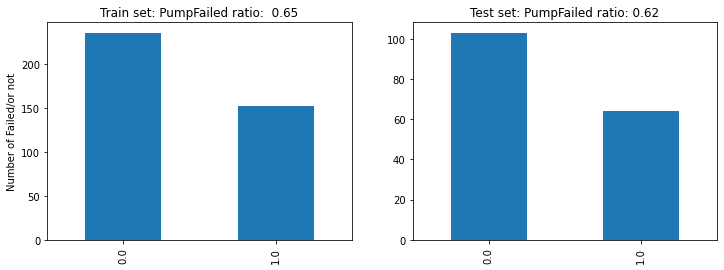

In [23]:
# Inspect the target variable 
train_pumpfailed_value_counts = df_train.PumpFailed.value_counts()
test_pumpfailed_value_counts = df_test.PumpFailed.value_counts()

plt.figure(figsize=(12,4))
plt.subplot(121)

train_pumpfailed_value_counts.plot.bar()
train_pumpfailed_ratio = train_pumpfailed_value_counts[1]/train_pumpfailed_value_counts[0]
plt.title(f'Train set: PumpFailed ratio: {train_pumpfailed_ratio: .2f}')
plt.ylabel('Number of Failed/or not')

plt.subplot(122)
test_pumpfailed_value_counts.plot.bar()
test_pumpfailed_ratio = test_pumpfailed_value_counts[1]/test_pumpfailed_value_counts[0]
plt.title(f'Test set: PumpFailed ratio: {test_pumpfailed_ratio:.2f}')


plt.show()

In [24]:
%pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [25]:
import xgboost
import vaex.ml.sklearn

features = ['MachineId','MeasurementId','SlowStart','SlowEnd','Pressure']
target = 'PumpFailed'

xgb_model = xgboost.sklearn.XGBClassifier(max_depth=11,
                                          learning_rate=0.1,
                                          n_estimators=500,
                                          subsample=0.75,
                                          colsample_bylevel=1,
                                          colsample_bytree=1,
                                          scale_pos_weight=1.5,
                                          reg_lambda=1.5,
                                          reg_alpha=5,
                                          n_jobs=-1,
                                          random_state=42,
                                          verbosity=0,
                                          use_label_encoder=False)

vaex_xgb_model = vaex.ml.sklearn.Predictor(features=features,
                                           target='PumpFailed',
                                           model=xgb_model,
                                           prediction_name='prediction_xgb')


#Train the model
vaex_xgb_model.fit(df_train)
#Get the prediction of the model on the training data
df_train = vaex_xgb_model.transform(df_train)

df_train

#,MachineId,MeasurementId,PumpFailed,SlowStart,SlowEnd,Pressure,prediction_xgb
0,2113,1312,0.0,0.0,0.0,0.0,0
1,2120,1319,1.0,0.0,0.0,0.0,1
2,2121,1319,1.0,0.0,0.0,0.0,1
3,2122,1319,1.0,0.0,0.0,0.0,1
4,2123,-1,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...
384,2203,8232,0.0,0.0,0.0,0.0,0
385,1500,-1,0.0,0.0,1.0,0.0,0
386,1501,8336,0.0,0.0,1.0,0.0,0
387,1502,-1,0.0,0.0,0.0,0.0,0


In [26]:
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
def binary_metrics(y_true, y_pred):
    acc = accuracy_score(y_true=y_true, y_pred=y_pred)
    f1 = f1_score(y_true=y_true, y_pred=y_pred)
    roc = roc_auc_score(y_true=y_true, y_score=y_pred)
    print(f'Accuracy:{acc: .3f}')
    print(f'f1 score: {f1:.3f}')
    print(f'roc_auc: {roc: .3f}')
    

In [27]:
print('Metrics for the training set:')
binary_metrics(y_true=df_train.PumpFailed.values, y_pred=df_train.prediction_xgb.values)

Metrics for the training set:
Accuracy: 0.887
f1 score: 0.867
roc_auc:  0.895


In [28]:
state = df_train.state_get()
df_test.state_set(state)
df_test.tail(100)

#,MachineId,MeasurementId,PumpFailed,SlowStart,SlowEnd,Pressure,prediction_xgb
0,33,127,0.0,0.0,1.0,0.0,0
1,1000,-1,1.0,0.0,0.0,0.0,0
2,1001,-1,1.0,0.0,0.0,0.0,0
3,1002,-1,1.0,0.0,0.0,0.0,0
4,1003,-1,1.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...
95,2102,-1,1.0,0.0,0.0,0.0,0
96,2103,1305,1.0,0.0,0.0,0.0,0
97,2110,-1,0.0,0.0,0.0,0.0,0
98,2111,-1,0.0,0.0,0.0,0.0,0


In [29]:
print('Metrics for the test set:')
binary_metrics(y_true=df_test.PumpFailed.values, y_pred=df_test.prediction_xgb.values)

Metrics for the test set:
Accuracy: 0.497
f1 score: 0.333
roc_auc:  0.465


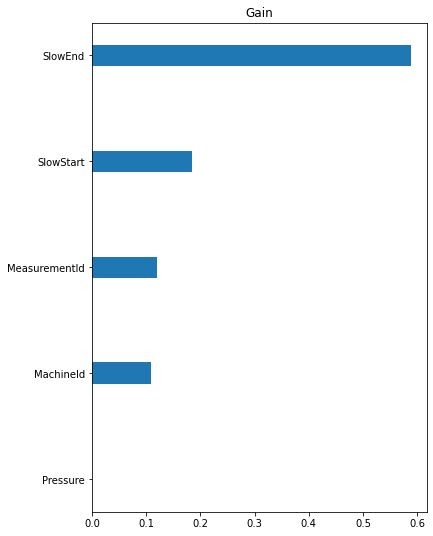

In [30]:
plt.figure(figsize=(6,9))

ind = np.argsort(xgb_model.feature_importances_)[::-1]
features_sorted = np.array(features)[ind]
importances_sorted = xgb_model.feature_importances_[ind]

plt.barh(y=range(len(features)), width=importances_sorted, height=0.2)
plt.title('Gain')
plt.yticks(ticks=range(len(features)), labels=features_sorted)
plt.gca().invert_yaxis()
plt.show()

In [31]:
from vaex.ml.sklearn import IncrementalPredictor
from sklearn.linear_model import SGDClassifier

model = SGDClassifier(learning_rate='constant', eta0=0.001, random_state=42)
vaex_model = IncrementalPredictor(features=features, target=target, model=model,
                                  batch_size=11_000_000, partial_fit_kwargs={'classes':[0,1]})
                            
vaex_model.fit(df_train, progress='widget')

df_train = vaex_model.transform(df_train)
df_train

#,MachineId,MeasurementId,PumpFailed,SlowStart,SlowEnd,Pressure,prediction_xgb,prediction
0,2113,1312,0.0,0.0,0.0,0.0,0,1
1,2120,1319,1.0,0.0,0.0,0.0,1,1
2,2121,1319,1.0,0.0,0.0,0.0,1,1
3,2122,1319,1.0,0.0,0.0,0.0,1,1
4,2123,-1,0.0,0.0,0.0,0.0,0,0
...,...,...,...,...,...,...,...,...
384,2203,8232,0.0,0.0,0.0,0.0,0,1
385,1500,-1,0.0,0.0,1.0,0.0,0,0
386,1501,8336,0.0,0.0,1.0,0.0,0,1
387,1502,-1,0.0,0.0,0.0,0.0,0,0


In [32]:
print('Metrics for the training set:')
binary_metrics(y_true=df_train.PumpFailed.values, y_pred=df_train.prediction.values)

Metrics for the training set:
Accuracy: 0.622
f1 score: 0.358
roc_auc:  0.560


In [33]:
state = df_train.state_get()
df_test.state_set(state)

df_test.tail(100)

#,MachineId,MeasurementId,PumpFailed,SlowStart,SlowEnd,Pressure,prediction_xgb,prediction
0,33,127,0.0,0.0,1.0,0.0,0,1
1,1000,-1,1.0,0.0,0.0,0.0,0,0
2,1001,-1,1.0,0.0,0.0,0.0,0,0
3,1002,-1,1.0,0.0,0.0,0.0,0,0
4,1003,-1,1.0,0.0,0.0,0.0,0,0
...,...,...,...,...,...,...,...,...
95,2102,-1,1.0,0.0,0.0,0.0,0,0
96,2103,1305,1.0,0.0,0.0,0.0,0,1
97,2110,-1,0.0,0.0,0.0,0.0,0,0
98,2111,-1,0.0,0.0,0.0,0.0,0,0


In [34]:
binary_metrics(y_true=df_test.PumpFailed.values,y_pred=df_test.prediction.values)

Accuracy: 0.635
f1 score: 0.384
roc_auc:  0.571
